In [10]:
%cd ..
%matplotlib inline
import numpy as np, scipy, IPython.display as ipd, matplotlib.pyplot as plt
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 5)

### Testing with cqt

In [3]:
# x, sr = librosa.load("./audio/tiny_aam/audio-mixes-mp3/0001_mix.mp3")
x1, sr = librosa.load("./audio/StructuredSamples/Piano/Alicias_Keys/Alicias_Keys_060_C4.wav")
x2, sr = librosa.load("./audio/StructuredSamples/Piano/Alicias_Keys/Alicias_Keys_079_G5.wav")
x = x1+x2
bins_per_octave = 12
fmin = librosa.note_to_hz("g#0")
cqt = librosa.cqt(x[:sr], sr=sr, n_bins=88, bins_per_octave=bins_per_octave, fmin=fmin)
# log_cqt = librosa.amplitude_to_db(np.abs(cqt))
cqt_mag = np.abs(cqt)

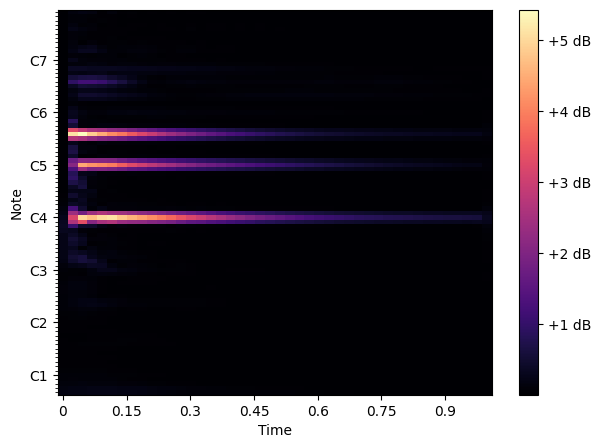

In [4]:
fig, ax = plt.subplots()
img = librosa.display.specshow(cqt_mag, sr=sr, x_axis='time', y_axis='cqt_note', 
                         bins_per_octave=bins_per_octave, fmin=fmin, ax=ax)


fig.colorbar(img, ax=ax, format="%+2.f dB")

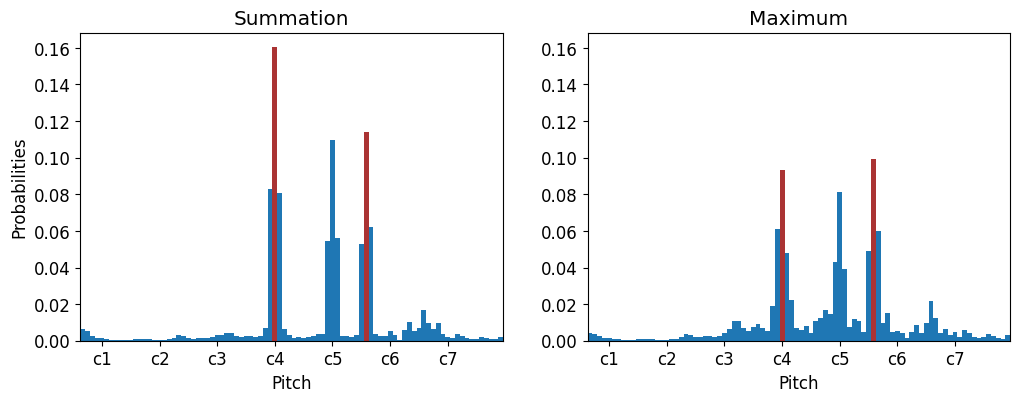

In [41]:
sums = np.sum(cqt_mag, axis=1)
probs_sum = sums / np.sum(sums)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4), sharey=True)
ax[0].bar(x=list(range(21, 21+len(sums))), height=probs_sum, width=1)
ax[0].patches[40].set_facecolor('#aa3333')
ax[0].patches[59].set_facecolor('#aa3333')
ax[0].set_xlabel("Pitch")
ax[0].set_ylabel("Probabilities")
ax[0].set_title("Summation")
ax[0].set_xticks(np.arange(25, 109, 12))
ax[0].set_xticklabels(["c1", "c2", "c3", "c4", "c5", "c6", "c7"])
ax[0].autoscale(enable=True, axis='x', tight=True)

maxes = np.max(cqt_mag, axis=1)
probs_max = maxes / np.sum(maxes)
ax[1].bar(x=list(range(21, 21+len(sums))), height=probs_max, width=1)
ax[1].patches[40].set_facecolor('#aa3333')
ax[1].patches[59].set_facecolor('#aa3333')
ax[1].set_xlabel("Pitch")
#ax[1].set_ylabel("Probabilities")
ax[1].set_title("Maximum")
ax[1].set_xticks(np.arange(25, 109, 12))
ax[1].set_xticklabels(["c1", "c2", "c3", "c4", "c5", "c6", "c7"])
ax[1].yaxis.set_tick_params(labelbottom=True)
ax[1].autoscale(enable=True, axis='x', tight=True)

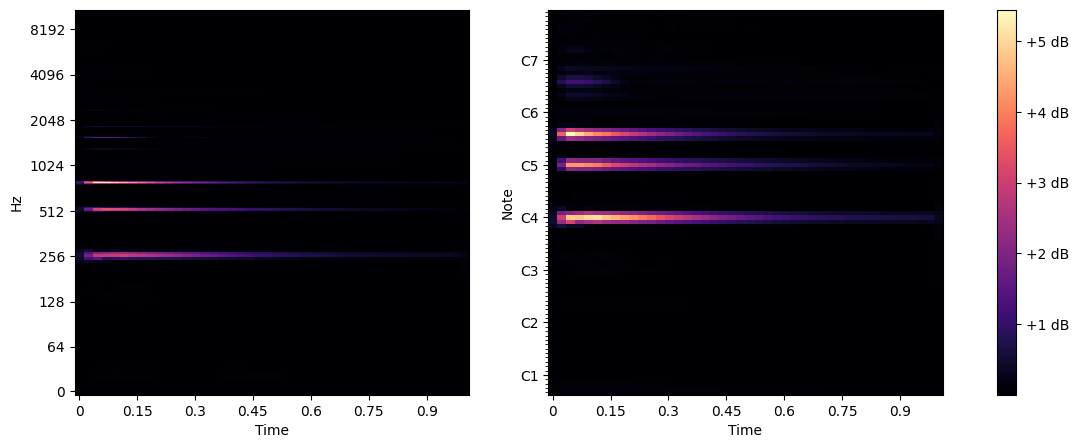

In [11]:
y_harm = librosa.effects.harmonic(y=x)
cqt_harm = librosa.cqt(y_harm[:sr], sr=sr, n_bins=88, bins_per_octave=bins_per_octave, fmin=fmin)
cqt_harm_magn = np.abs(cqt_harm)
log_cqt_harm = librosa.amplitude_to_db(np.abs(cqt_harm))
stft_harm = np.abs(librosa.stft(y_harm[:sr]))
fig, ax = plt.subplots(ncols=2)
img = librosa.display.specshow(stft_harm, sr=sr, x_axis='time', y_axis='log', ax=ax[0])
img = librosa.display.specshow(cqt_harm_magn, sr=sr, x_axis='time', y_axis='cqt_note', 
                         bins_per_octave=bins_per_octave, fmin=fmin, ax=ax[1])
fig.colorbar(img, ax=ax, format="%+2.f dB")

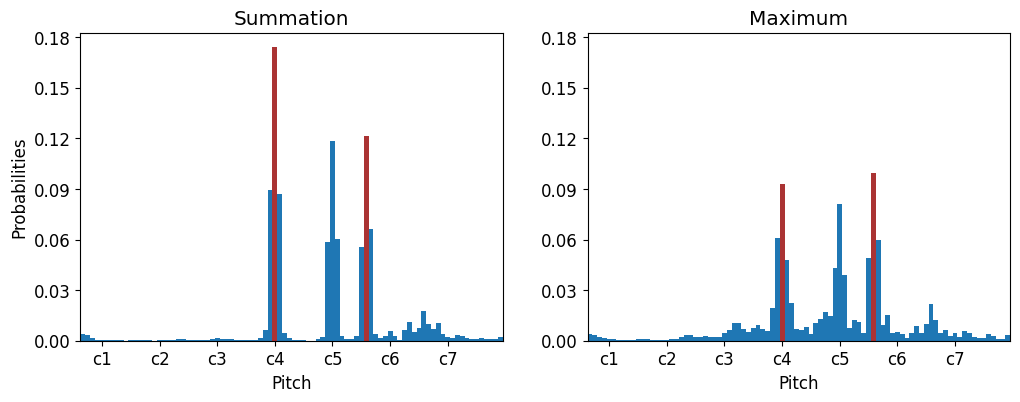

In [45]:
sums = np.sum(cqt_harm_magn, axis=1)
probs_sum = sums / np.sum(sums)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4),sharey=True)

maxes = np.max(cqt_harm_magn, axis=1)
probs_max = maxes / np.sum(maxes)

ax[0].bar(x=list(range(21, 21+len(sums))), height=probs_sum, width=1)
ax[0].patches[40].set_facecolor('#aa3333')
ax[0].patches[59].set_facecolor('#aa3333')
ax[0].set_xlabel("Pitch")
ax[0].set_ylabel("Probabilities")
ax[0].set_title("Summation")
ax[0].set_xticks(np.arange(25, 109, 12))
ax[0].set_xticklabels(["c1", "c2", "c3", "c4", "c5", "c6", "c7"])
ax[0].set_yticks([0, 0.03, 0.06, 0.09, 0.12, 0.15, 0.18])
ax[0].autoscale(enable=True, axis='x', tight=True)

maxes = np.max(cqt_mag, axis=1)
probs_max = maxes / np.sum(maxes)
ax[1].bar(x=list(range(21, 21+len(sums))), height=probs_max, width=1)
ax[1].patches[40].set_facecolor('#aa3333')
ax[1].patches[59].set_facecolor('#aa3333')
ax[1].set_xlabel("Pitch")
#ax[1].set_ylabel("Probabilities")
ax[1].set_title("Maximum")
ax[1].set_xticks(np.arange(25, 109, 12))
ax[1].set_xticklabels(["c1", "c2", "c3", "c4", "c5", "c6", "c7"])
ax[1].yaxis.set_tick_params(labelbottom=True)
ax[1].autoscale(enable=True, axis='x', tight=True)

In [66]:
sums = np.sum(cqt_harm_magn, axis=1)
part_idx = np.argpartition(sums, kth=-k_pitches)[-k_pitches]
part_val = sums[part_idx]
sums[sums < (part_val - 0.0001)] = 0
probs_sum = sums / np.sum(sums)

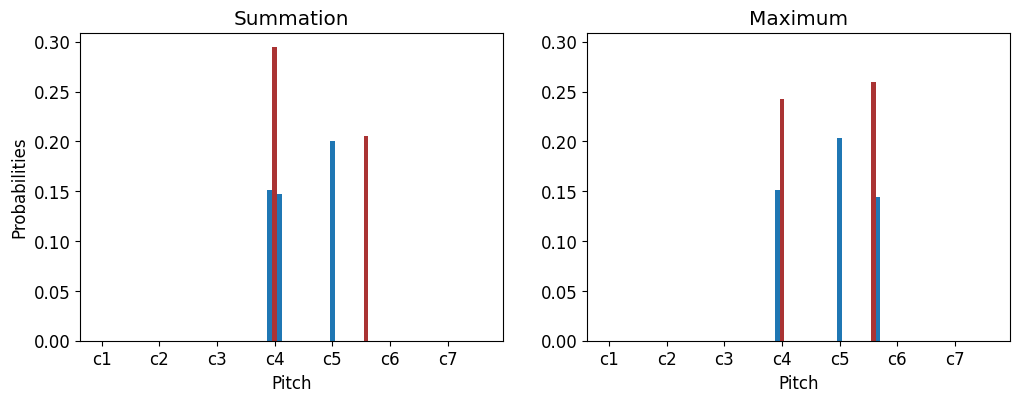

In [47]:
k_pitches = 5
sums = np.sum(cqt_harm_magn, axis=1)
part_idx = np.argpartition(sums, kth=-k_pitches)[-k_pitches]
part_val = sums[part_idx]
sums[sums < (part_val - 0.0001)] = 0
probs_sum = sums / np.sum(sums)

maxes = np.max(cqt_harm_magn, axis=1)
part_idx = np.argpartition(maxes, kth=-k_pitches)[-k_pitches]
part_val = maxes[part_idx]
maxes[maxes < (part_val - 0.0001)] = 0
probs_max = maxes / np.sum(maxes)


fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4), sharey=True)

ax[0].bar(x=list(range(21, 21+len(sums))), height=probs_sum, width=1)
ax[0].patches[40].set_facecolor('#aa3333')
ax[0].patches[59].set_facecolor('#aa3333')
ax[0].set_xlabel("Pitch")
ax[0].set_ylabel("Probabilities")
ax[0].set_title("Summation")
ax[0].set_xticks(np.arange(25, 109, 12))
ax[0].set_xticklabels(["c1", "c2", "c3", "c4", "c5", "c6", "c7"])
ax[0].set_yticks([0, 0.05, 0.1, 0.15, 0.20, 0.25, 0.3])
ax[0].autoscale(enable=True, axis='x', tight=True)

ax[1].bar(x=list(range(21, 21+len(sums))), height=probs_max, width=1)
ax[1].patches[40].set_facecolor('#aa3333')
ax[1].patches[59].set_facecolor('#aa3333')
ax[1].set_xlabel("Pitch")
#ax[1].set_ylabel("Probabilities")
ax[1].set_title("Maximum")
ax[1].set_xticks(np.arange(25, 109, 12))
ax[1].set_xticklabels(["c1", "c2", "c3", "c4", "c5", "c6", "c7"])
ax[1].yaxis.set_tick_params(labelbottom=True)
ax[1].autoscale(enable=True, axis='x', tight=True)

In [23]:
def extract_pitch_probabilities(y, sr=22050, n_bins=88, bins_per_octave=12, fmin=librosa.note_to_hz("a0"), k_pitches=10):
    """Estimates the pitches in the given signal y and turns
    these estimations into a probability distribution.

    Parameters
    ----------
    y : np.ndarray
        Input signal.
    sr : int, optional
        Sample rate, by default 22050
    n_bins : int, optional
        Number of bins to return, 
        Passed to librosa.cqt, by default 88
    bins_per_octave : int, optional
        Passed to librosa.cqt, by default 12
    fmin : float, optional
        Minimum frequency for librosa.cqt, by default librosa.note_to_hz("f0")

    Returns
    -------
    np.ndarray
        A probability distribution across the 88 pitches we are working with.
    """
    cqt = librosa.cqt(y=y, sr=sr, n_bins=n_bins, bins_per_octave=bins_per_octave, fmin=fmin)
    #log_cqt = librosa.amplitude_to_db(np.abs(cqt))
    abs_cqt = np.abs(cqt)
    clipped_cqt = np.clip(abs_cqt, a_min=0, a_max=None)
    cqt_sum = np.sum(clipped_cqt, axis=1)
    part_idx = np.argpartition(cqt_sum, kth=-k_pitches)[-k_pitches]
    part_val = cqt_sum[part_idx]
    cqt_sum[cqt_sum < (part_val - 0.0001)] = 0
    sum_norm = cqt_sum / np.sum(cqt_sum)
    if np.isnan(sum_norm).any() or not np.isclose(np.sum(sum_norm), 1):
        return [1/len(sum_norm) for _ in range(len(sum_norm))]
    else:
        return sum_norm


### Test initial population error

In [5]:
from typing import Any, Callable, Union

import numpy as np
from tqdm import tqdm

from evoaudio.sample_library import SampleLibrary
from evoaudio.individual import BaseIndividual
from evoaudio.mutations import Mutator
from evoaudio.fitness import multi_onset_fitness_cached
from evoaudio.population import Population
from evoaudio.population_logging import PopulationLogger
from evoaudio.target import Target

N_SAMPLES_P = [0.1, 0.3, 0.3, 0.2, 0.1]
POPSIZE = 10
N_RUNS = 100

def create_weighted_individual(pitch_weights:list[float], sample_lib:SampleLibrary):
    ind = BaseIndividual()
    n_samples = np.random.choice(list(range(5)), p=N_SAMPLES_P) + 1
    drawn_pitches = np.random.choice(list(range(21, 109)), size=n_samples, p=pitch_weights)
    instruments = [sample_lib.get_random_instrument_for_pitch(pitch) for pitch in drawn_pitches]
    ind.samples = [sample_lib.get_sample(instrument, style, drawn_pitches[i]) for i, (instrument, style) in enumerate(instruments)]
    return ind

def init_population(sample_lib:SampleLibrary, target:Target, popsize:int, pitch_weights:list[float]) -> Population:
    # Create initial population
    population = Population()
    population.individuals = [create_weighted_individual(pitch_weights=pitch_weights, sample_lib=sample_lib) for _ in tqdm(range(popsize), desc="Initializing Population", disable=True)]
    for individual in tqdm(population.individuals, desc="Calculating initial fitness", disable=True):
        # Calc initial fitness
        individual.fitness_per_onset = multi_onset_fitness_cached(target, individual)
        individual.calc_phi_fitness()
    population.init_archive(target.onsets) # Initial record of best approximations of each onset
    population.sort_individuals_by_fitness() # Sort population for easier management
    return population

def create_sample_set(sample_lib:SampleLibrary):
    individuals = [BaseIndividual.create_random_individual(sample_lib=sample_lib, phi=1.0) for _ in range(N_RUNS)]
    # Ensure pitches are below a threshold (c6) so that 
    # the shift doesn't raise pitch too high
    for individual in individuals:
        for i, sample in enumerate(individual.samples):
            if sample.pitch > 84: # c6
                new_pitch = sample.pitch - 12
                instrument, style = sample_lib.get_random_instrument_for_pitch(new_pitch)
                individual.samples[i] = sample_lib.get_sample(instrument=instrument, style=style, pitch=new_pitch)
    annotations = [[(sample.instrument, str(sample.pitch.value)) for sample in ind.samples] for ind in individuals]
    return individuals, annotations


In [6]:
sample_lib = SampleLibrary()
individuals, annotations = create_sample_set(sample_lib)

Loading samples: 100%|██████████| 6826/6826 [00:08<00:00, 834.12it/s] 


## Baseline (Uniform)

In [8]:
from evoaudio.base_algorithms import approximate_piece
from evoaudio.jaccard import jaccard_error, class_mode

mixes = [ind.to_mixdown() for ind in individuals]
targets = [Target(y=mix, onsets=[0]) for mix in mixes]
pitch_weights = [np.repeat(1/88, 88) for mix in mixes] # Uniform weights
pops = [init_population(sample_lib=sample_lib, target=target, popsize=POPSIZE, pitch_weights=pitch_weights[i]) for i, target in enumerate(targets)]
errors = []
for i, annotation in enumerate(annotations):
    pop = pops[i]
    errors.append(jaccard_error(pop, {0: annotation}, class_mode.PITCHES))
print(f"Errors for baseline = {np.mean(errors)}")

Errors for baseline = 0.9650992063492063


## Test CQT with ranks

In [11]:
def extract_pitches_cqt_ranked(y, sr=22050, n_bins=88, bins_per_octave=12, fmin=librosa.note_to_hz("a0"), k_pitches=10):
    """Estimates the pitches in the given signal y and turns
    these estimations into a probability distribution.

    Parameters
    ----------
    y : np.ndarray
        Input signal.
    sr : int, optional
        Sample rate, by default 22050
    n_bins : int, optional
        Number of bins to return, 
        Passed to librosa.cqt, by default 88
    bins_per_octave : int, optional
        Passed to librosa.cqt, by default 12
    fmin : float, optional
        Minimum frequency for librosa.cqt, by default librosa.note_to_hz("f0")

    Returns
    -------
    np.ndarray
        A probability distribution across the 88 pitches we are working with.
    """
    cqt = librosa.cqt(y=y, sr=sr, n_bins=n_bins, bins_per_octave=bins_per_octave, fmin=fmin)
    #log_cqt = librosa.amplitude_to_db(np.abs(cqt))
    abs_cqt = np.abs(cqt)
    clipped_cqt = np.clip(abs_cqt, a_min=0, a_max=None)
    cqt_sum = np.sum(clipped_cqt, axis=1)
    part_idx = np.argpartition(cqt_sum, kth=-k_pitches)[-k_pitches]
    part_val = cqt_sum[part_idx]
    cqt_sum[cqt_sum < (part_val - 0.0001)] = 0
    sum_norm = cqt_sum / np.sum(cqt_sum)
    if np.isnan(sum_norm).any() or not np.isclose(np.sum(sum_norm), 1):
        return [1/len(sum_norm) for _ in range(len(sum_norm))]
    else:
        return sum_norm

In [14]:
full_errors = []
mixes = [ind.to_mixdown() for ind in individuals]
targets = [Target(y=mix, onsets=[0]) for mix in mixes]
for k in range(1, 20):
    pitch_weights = [extract_pitches_cqt_ranked(y=mix, k_pitches=k) for mix in mixes]
    pops = [init_population(sample_lib=sample_lib, target=target, popsize=POPSIZE, pitch_weights=pitch_weights[i]) for i, target in enumerate(targets)]
    errors = []
    for i, annotation in enumerate(annotations):
        pop = pops[i]
        errors.append(jaccard_error(pop, {0: annotation}, class_mode.PITCHES))
    full_errors.append(np.mean(errors))
    print(f"Errors for k = {k}: {full_errors[-1]}")

Errors for k = 1: 0.7216666666666667
Errors for k = 2: 0.6888333333333333
Errors for k = 3: 0.6934047619047619
Errors for k = 4: 0.7214047619047619
Errors for k = 5: 0.7063690476190474
Errors for k = 6: 0.717107142857143
Errors for k = 7: 0.7461666666666666
Errors for k = 8: 0.753781746031746
Errors for k = 9: 0.7505714285714284
Errors for k = 10: 0.7445555555555555
Errors for k = 11: 0.7536785714285713
Errors for k = 12: 0.7985317460317459
Errors for k = 13: 0.74690873015873
Errors for k = 14: 0.7808571428571429
Errors for k = 15: 0.7430079365079365
Errors for k = 16: 0.7539603174603176
Errors for k = 17: 0.7660119047619047
Errors for k = 18: 0.7830952380952381
Errors for k = 19: 0.7740714285714284


## Test CQT with max 

In [13]:
def extract_pitches_cqt_ranked_max(y, sr=22050, n_bins=88, bins_per_octave=12, fmin=librosa.note_to_hz("a0"), k_pitches=10):
    """Estimates the pitches in the given signal y and turns
    these estimations into a probability distribution.

    Parameters
    ----------
    y : np.ndarray
        Input signal.
    sr : int, optional
        Sample rate, by default 22050
    n_bins : int, optional
        Number of bins to return, 
        Passed to librosa.cqt, by default 88
    bins_per_octave : int, optional
        Passed to librosa.cqt, by default 12
    fmin : float, optional
        Minimum frequency for librosa.cqt, by default librosa.note_to_hz("f0")

    Returns
    -------
    np.ndarray
        A probability distribution across the 88 pitches we are working with.
    """
    cqt = librosa.cqt(y=y, sr=sr, n_bins=n_bins, bins_per_octave=bins_per_octave, fmin=fmin)
    #log_cqt = librosa.amplitude_to_db(np.abs(cqt))
    abs_cqt = np.abs(cqt)
    clipped_cqt = np.clip(abs_cqt, a_min=0, a_max=None)
    cqt_max = np.max(clipped_cqt, axis=1)
    part_idx = np.argpartition(cqt_max, kth=-k_pitches)[-k_pitches]
    part_val = cqt_max[part_idx]
    cqt_max[cqt_max < (part_val - 0.0001)] = 0
    sum_norm = cqt_max / np.sum(cqt_max)
    if np.isnan(sum_norm).any() or not np.isclose(np.sum(sum_norm), 1):
        return [1/len(sum_norm) for _ in range(len(sum_norm))]
    else:
        return sum_norm


In [18]:
full_errors = []
mixes = [ind.to_mixdown() for ind in individuals]
targets = [Target(y=mix, onsets=[0]) for mix in mixes]
for k in range(1, 20):
    pitch_weights = [extract_pitches_cqt_ranked_max(y=mix, k_pitches=k) for mix in mixes]
    pops = [init_population(sample_lib=sample_lib, target=target, popsize=POPSIZE, pitch_weights=pitch_weights[i]) for i, target in enumerate(targets)]
    errors = []
    for i, annotation in enumerate(annotations):
        pop = pops[i]
        errors.append(jaccard_error(pop, {0: annotation}, class_mode.PITCHES))
    full_errors.append(np.mean(errors))
    print(f"Errors for k = {k}: {full_errors[-1]}")

Errors for k = 1: 0.7481666666666668
Errors for k = 2: 0.7175
Errors for k = 3: 0.7134999999999999
Errors for k = 4: 0.7054642857142857
Errors for k = 5: 0.7395952380952382
Errors for k = 6: 0.7564047619047618
Errors for k = 7: 0.7487857142857142
Errors for k = 8: 0.7645119047619047
Errors for k = 9: 0.7821309523809525
Errors for k = 10: 0.7867380952380951
Errors for k = 11: 0.8095952380952381
Errors for k = 12: 0.792547619047619
Errors for k = 13: 0.8150714285714287
Errors for k = 14: 0.7799722222222222
Errors for k = 15: 0.8217460317460318
Errors for k = 16: 0.8248174603174602
Errors for k = 17: 0.8375833333333333
Errors for k = 18: 0.7998412698412699
Errors for k = 19: 0.7926507936507936


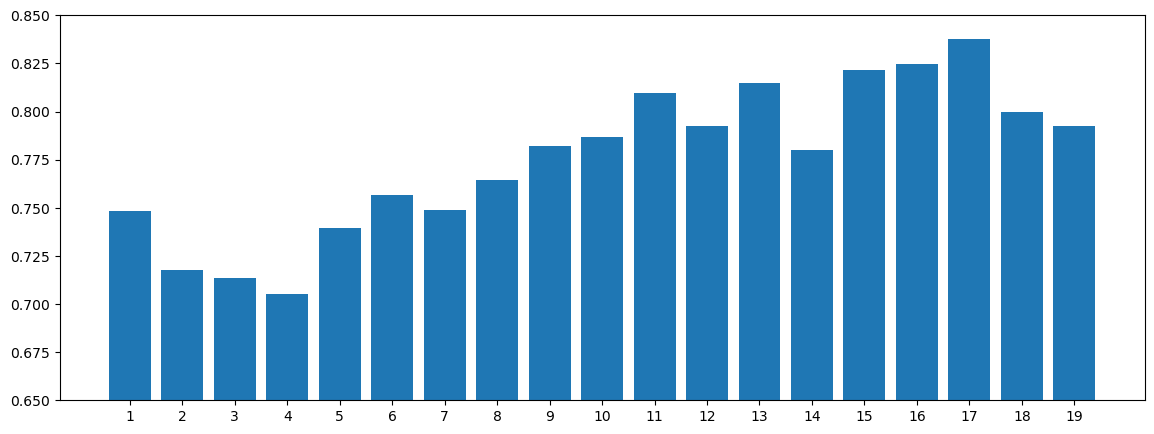

In [21]:
plt.bar(x=list(range(1, 20)), height=full_errors)
plt.ylim((0.65, 0.85))
plt.xticks(list(range(1, 20)))
plt.show()

## Test CQT on extracted harmonics 

Default margins, Summation Method

In [12]:
full_errors = []
mixes = [librosa.effects.harmonic(y=ind.to_mixdown()) for ind in tqdm(individuals, desc="Separating harmonics")]
targets = [Target(y=mix, onsets=[0]) for mix in mixes]
for k in range(1, 20):
    pitch_weights = [extract_pitches_cqt_ranked(y=mix, k_pitches=k) for mix in mixes]
    pops = [init_population(sample_lib=sample_lib, target=target, popsize=POPSIZE, pitch_weights=pitch_weights[i]) for i, target in enumerate(targets)]
    errors = []
    for i, annotation in enumerate(annotations):
        pop = pops[i]
        errors.append(jaccard_error(pop, {0: annotation}, class_mode.PITCHES))
    full_errors.append(np.mean(errors))
    print(f"Errors for k = {k}: {full_errors[-1]}")

Separating harmonics: 100%|██████████| 100/100 [00:22<00:00,  4.44it/s]


Errors for k = 1: 0.7163333333333335
Errors for k = 2: 0.6656666666666666
Errors for k = 3: 0.6569999999999999
Errors for k = 4: 0.6660595238095237
Errors for k = 5: 0.6842619047619047
Errors for k = 6: 0.6759642857142856
Errors for k = 7: 0.7070476190476191
Errors for k = 8: 0.7132976190476189
Errors for k = 9: 0.6645238095238095
Errors for k = 10: 0.7594642857142857
Errors for k = 11: 0.7110833333333333
Errors for k = 12: 0.7126904761904761
Errors for k = 13: 0.7519047619047619
Errors for k = 14: 0.7215555555555555
Errors for k = 15: 0.7648809523809526
Errors for k = 16: 0.7810476190476189


Separating harmonics:   9%|▉         | 9/100 [03:43<37:36, 24.80s/it]


Errors for k = 17: 0.7867619047619047
Errors for k = 18: 0.7446666666666667
Errors for k = 19: 0.7865714285714286


Maximum Method

In [14]:
full_errors_max = []
for k in range(1, 20):
    pitch_weights = [extract_pitches_cqt_ranked_max(y=mix, k_pitches=k) for mix in mixes]
    pops = [init_population(sample_lib=sample_lib, target=target, popsize=POPSIZE, pitch_weights=pitch_weights[i]) for i, target in enumerate(targets)]
    errors = []
    for i, annotation in enumerate(annotations):
        pop = pops[i]
        errors.append(jaccard_error(pop, {0: annotation}, class_mode.PITCHES))
    full_errors_max.append(np.mean(errors))
    print(f"Errors for k = {k}: {full_errors_max[-1]}")

Errors for k = 1: 0.7530000000000001
Errors for k = 2: 0.7285
Errors for k = 3: 0.6790714285714284
Errors for k = 4: 0.7172142857142856
Errors for k = 5: 0.7220833333333333
Errors for k = 6: 0.7271031746031746
Errors for k = 7: 0.722595238095238
Errors for k = 8: 0.7862380952380952
Errors for k = 9: 0.7256746031746032
Errors for k = 10: 0.779547619047619
Errors for k = 11: 0.7634523809523809
Errors for k = 12: 0.7513690476190478
Errors for k = 13: 0.8067341269841269
Errors for k = 14: 0.8007380952380951
Errors for k = 15: 0.7901428571428571
Errors for k = 16: 0.7854880952380953
Errors for k = 17: 0.7409166666666666
Errors for k = 18: 0.8057142857142854
Errors for k = 19: 0.817345238095238


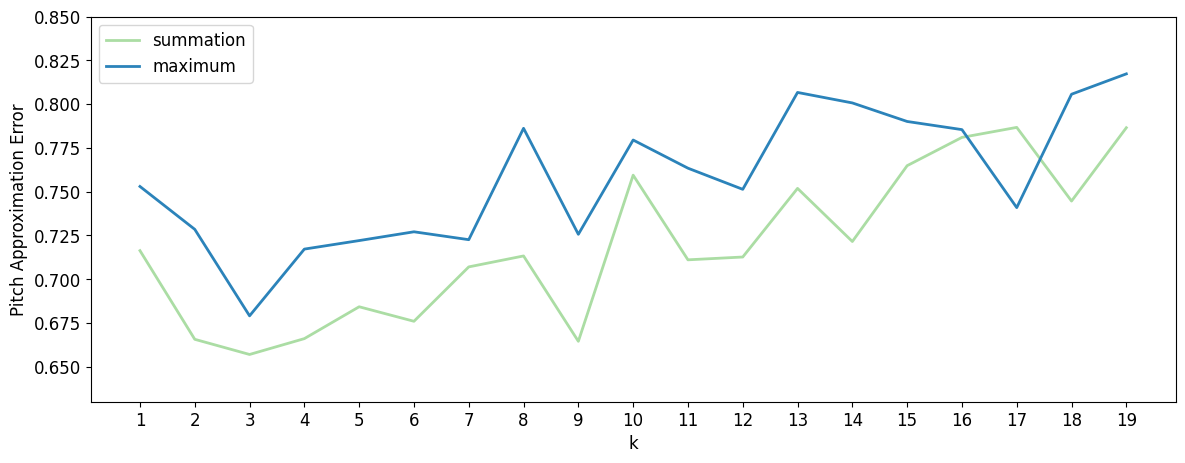

In [9]:
# plt.bar(x=np.array(list(range(1, 20)))-0.2, height=full_errors, label="summation", width=0.4)
# plt.bar(x=np.array(list(range(1, 20)))+0.2, height=full_errors_max, label="maximum", width=0.4)
plt.rcParams.update({'font.size': 12})
plt.plot(np.array(list(range(1, 20))), full_errors, label="summation", linewidth=2, color="#abdda4")
plt.plot(np.array(list(range(1, 20))), full_errors_max, label="maximum", linewidth=2, color="#2b83ba")
plt.ylim((0.63, 0.85))
plt.xticks(list(range(1, 20)))
plt.ylabel("Pitch Approximation Error")
plt.xlabel("k")
plt.legend()
plt.savefig("fig.png")

With higher margin (3.0)

In [43]:
full_errors = []
mixes = [librosa.effects.harmonic(y=ind.to_mixdown(), margin=3.0) for ind in tqdm(individuals, desc="Separating harmonics")]
targets = [Target(y=mix, onsets=[0]) for mix in mixes]
for k in range(1, 20):
    pitch_weights = [extract_pitches_cqt_ranked(y=mix, k_pitches=k) for mix in mixes]
    pops = [init_population(sample_lib=sample_lib, target=target, popsize=POPSIZE, pitch_weights=pitch_weights[i]) for i, target in enumerate(targets)]
    errors = []
    for i, annotation in enumerate(annotations):
        pop = pops[i]
        errors.append(jaccard_error(pop, {0: annotation}, class_mode.PITCHES))
    full_errors.append(np.mean(errors))
    print(f"Errors for k = {k}: {full_errors[-1]}")

Separating harmonics: 100%|██████████| 100/100 [00:22<00:00,  4.36it/s]


Errors for k = 1: 0.7291666666666667
Errors for k = 2: 0.6768333333333334
Errors for k = 3: 0.6816428571428571
Errors for k = 4: 0.6809047619047619
Errors for k = 5: 0.6889642857142857
Errors for k = 6: 0.7397142857142858
Errors for k = 7: 0.7138809523809523
Errors for k = 8: 0.7581071428571429
Errors for k = 9: 0.709452380952381
Errors for k = 10: 0.7267222222222222
Errors for k = 11: 0.7172857142857143
Errors for k = 12: 0.7264285714285715
Errors for k = 13: 0.7646190476190476
Errors for k = 14: 0.7426071428571427
Errors for k = 15: 0.8086309523809524
Errors for k = 16: 0.7672976190476191
Errors for k = 17: 0.7947261904761903
Errors for k = 18: 0.7860714285714284
Errors for k = 19: 0.7617817460317459


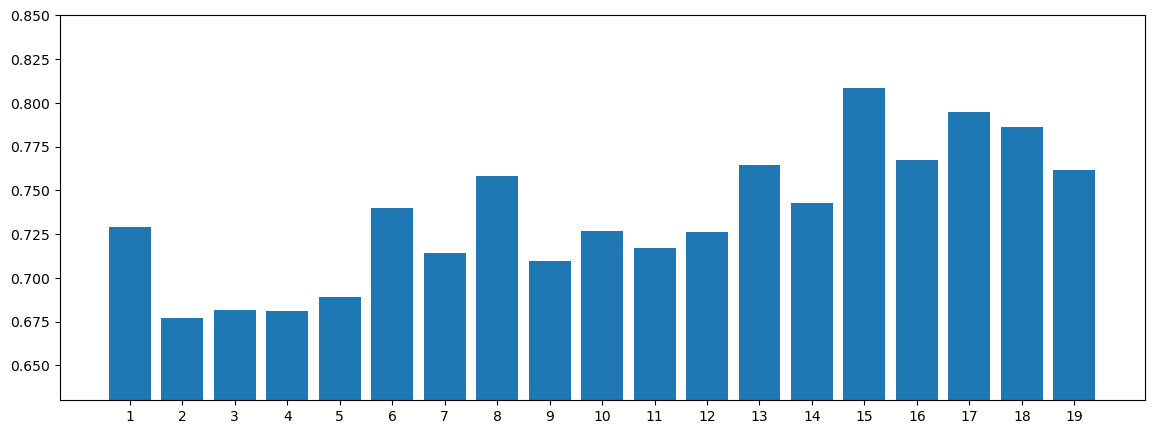

In [44]:
plt.bar(x=list(range(1, 20)), height=full_errors)
plt.ylim((0.63, 0.85))
plt.xticks(list(range(1, 20)))
plt.show()